#  EDA - Exploratory Data Analysis

This notebook focuses on data loading and initial exploration for the Forecast + Alerting pipeline.

## Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')


# Add project root to path

project_root = os.getcwd()

if os.path.basename(project_root) in ['pipeline_walkthrough', 'notebooks']:

    project_root = os.path.dirname(project_root)
sys.path.append(project_root)


# Import our pipeline modules

from src.loader import load_operations_data, load_site_meta, merge_data


# Set up plotting style

plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print(" All imports successful!")

 All imports successful!


##  Phase 1: Data Loading & Initial Exploration



In [2]:
# Load the raw data

print(" Loading operations data...")

ops_df = load_operations_data()
print(f" Operations data loaded: {ops_df.shape[0]} rows, {ops_df.shape[1]} columns")


print("\n Loading site metadata...")

meta_df = load_site_meta()
print(f" Site metadata loaded: {meta_df.shape[0]} rows, {meta_df.shape[1]} columns")


print("\n Merging datasets...")

df = merge_data(ops_df, meta_df)
print(f" Merged dataset: {df.shape[0]} rows, {df.shape[1]} columns")
ops_df
meta_df
df

 Loading operations data...
Looking for file at: c:\Users\hardi\OneDrive\Desktop\task\logic_leap_horizon_datasets\operations_daily_365d.csv
File exists: True
 Operations data loaded: 1460 rows, 13 columns

 Loading site metadata...
Looking for file at: c:\Users\hardi\OneDrive\Desktop\task\logic_leap_horizon_datasets\site_meta.csv
File exists: True
 Site metadata loaded: 4 rows, 4 columns

 Merging datasets...
 Merged dataset: 1460 rows, 16 columns


,date,site_id,units_produced,downtime_minutes,power_kwh,rework_units,defects_ppm,staff_count,material_cost_per_unit,price_per_unit,temperature_c,rainfall_mm,holiday_flag,region,commissioned_year,shift_hours_per_day
0,2025-01-01,S1,1280,34,4211,27,453,56,71.94,96.04,21.7,0.0,0,South,2018,20
1,2025-01-02,S1,1249,193,5471,40,480,55,71.87,95.90,22.4,0.0,0,South,2018,20
2,2025-01-03,S1,1163,43,4178,33,454,53,72.04,96.11,22.7,0.0,0,South,2018,20
3,2025-01-04,S1,1348,32,4554,35,387,54,72.26,95.99,22.7,0.0,0,South,2018,20
4,2025-01-05,S1,0,0,0,0,0,0,0.00,0.00,21.9,0.0,1,South,2018,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2025-12-27,S4,1231,67,4378,30,596,53,72.91,99.50,23.9,0.0,0,East,2015,20
1456,2025-12-28,S4,1122,62,3853,16,509,53,72.82,99.61,24.5,0.0,0,East,2015,20
1457,2025-12-29,S4,1515,77,5032,41,490,55,72.69,99.66,22.2,0.0,0,East,2015,20
1458,2025-12-30,S4,1259,66,4250,33,417,56,73.22,99.56,23.3,0.0,0,East,2015,20


In [3]:
# Basic data overview

print("\n Dataset Overview:")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Sites: {sorted(df['site_id'].unique())}")
print(f"Total records: {len(df):,}")
print(f"Records per site: {df['site_id'].value_counts().to_dict()}")

print("\n Data Types:")
print(df.dtypes)


 Dataset Overview:
Date range: 2025-01-01 00:00:00 to 2025-12-31 00:00:00
Sites: ['S1', 'S2', 'S3', 'S4']
Total records: 1,460
Records per site: {'S1': 365, 'S2': 365, 'S3': 365, 'S4': 365}

 Data Types:
date                      datetime64[ns]
site_id                           object
units_produced                     int64
downtime_minutes                   int64
power_kwh                          int64
rework_units                       int64
defects_ppm                        int64
staff_count                        int64
material_cost_per_unit           float64
price_per_unit                   float64
temperature_c                    float64
rainfall_mm                      float64
holiday_flag                       int64
region                            object
commissioned_year                  int64
shift_hours_per_day                int64
dtype: object


In [4]:
# Quick statistical summary

print("\n Basic Statistics:")

summary_stats = df[['units_produced', 'power_kwh', 'downtime_minutes', 'temperature_c']].describe()

print(summary_stats)


 Basic Statistics:
       units_produced    power_kwh  downtime_minutes  temperature_c
count     1460.000000  1460.000000       1460.000000    1460.000000
mean      1207.762329  4274.854110         61.685616      27.929315
std        372.807641  1348.800593         47.356136       4.418956
min          0.000000     0.000000          0.000000      19.800000
25%       1116.000000  3961.500000         42.000000      23.900000
50%       1276.000000  4456.000000         56.000000      27.800000
75%       1422.000000  4955.000000         69.000000      32.000000
max       1882.000000  7970.000000        333.000000      36.400000


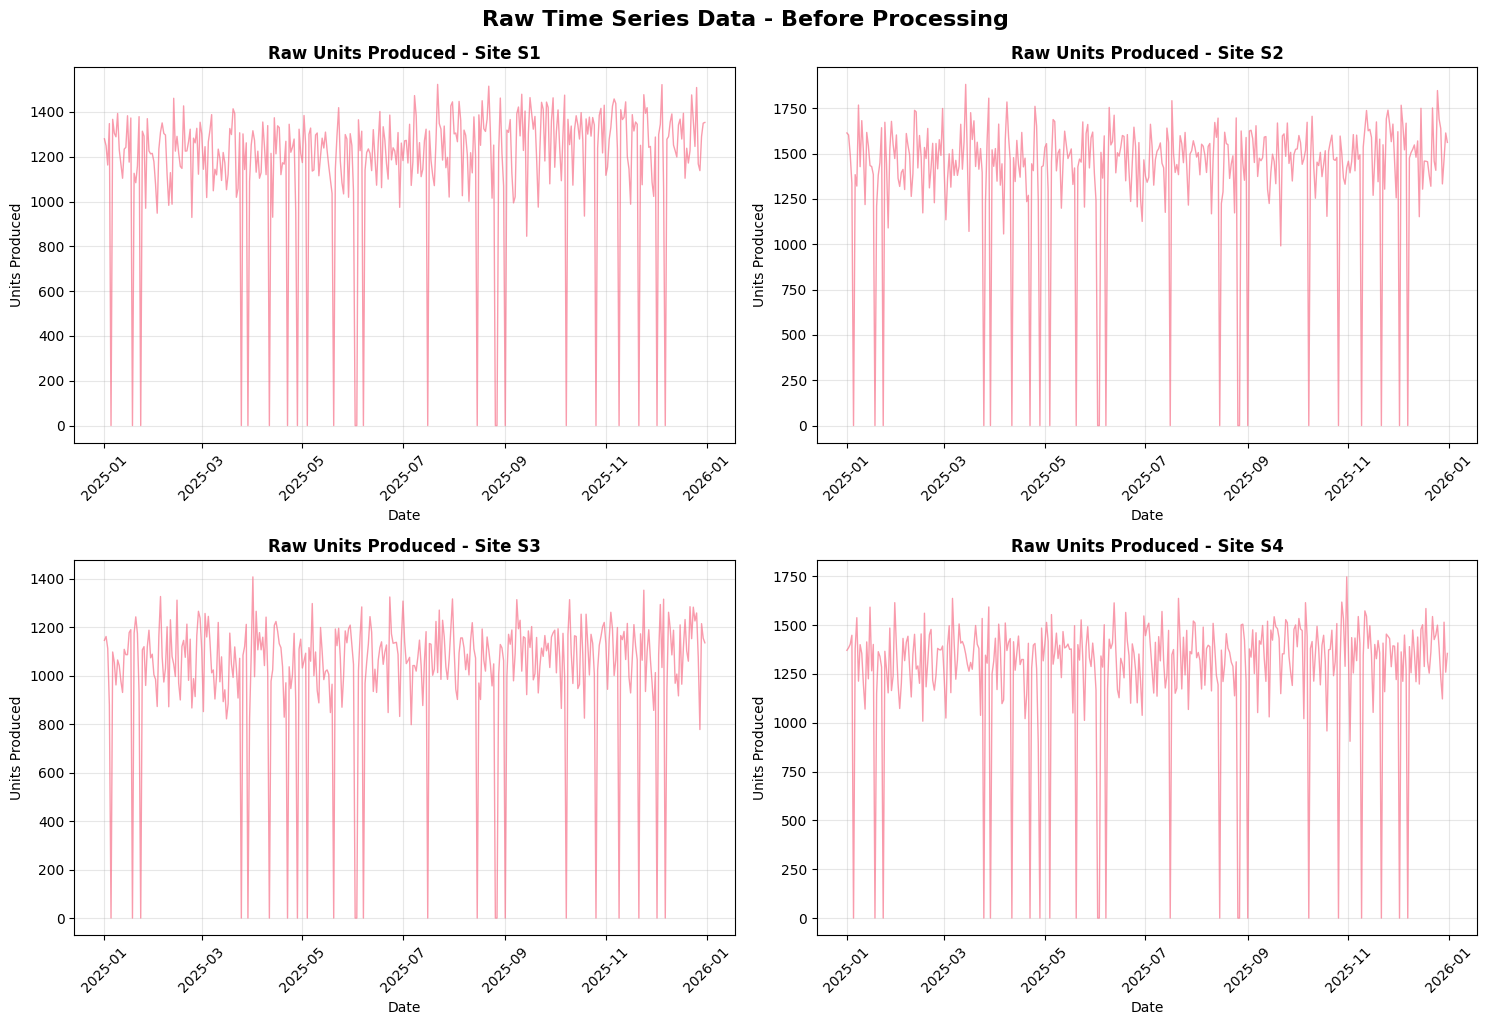


 Key Observations from Raw Data:
 Data spans 365 days (full year)
 Clear daily patterns with some irregularities
 Different baseline levels across sites
 Some periods show zero production (likely holidays/weekends)


In [5]:
# Visualize raw data patterns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()


for i, site in enumerate(sorted(df['site_id'].unique())):

    site_data = df[df['site_id'] == site]

    axes[i].plot(site_data['date'], site_data['units_produced'], alpha=0.7, linewidth=1)
    axes[i].set_title(f'Raw Units Produced - Site {site}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Units Produced')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.suptitle('Raw Time Series Data - Before Processing', fontsize=16, fontweight='bold', y=1.02)
plt.show()


print("\n Key Observations from Raw Data:")
print(" Data spans 365 days (full year)")
print(" Clear daily patterns with some irregularities")
print(" Different baseline levels across sites")
print(" Some periods show zero production (likely holidays/weekends)")